<a href="https://colab.research.google.com/github/dschomme/ADS/blob/main/ADS_11_%ED%8C%90%EB%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

판별분석은 구분되어 있는 집단의 구분기준이 정확한지를 위한 분석이라고 생각하면 됨.
비율척도 측정이 된 피쳐와 타겟변수 간의 관계를 분석하는 것이 목적.

이때 각 집단의 차이를 설명해줄 수 있는 판별식(판별함수)를 만들고 이 것을 활용해서 나누어진 집단의 체계를 판별하는 것이다.

즉 타겟의 class가 0인 데이터와, 타겟의 class가 1인 데이터 간의 차이의 특성을 파악해서 새로운 데이터(예측해야 할 데이터)가 들어왔을 때, 위의 차이를 기준으로 어떤 class에 포함될지를 결정한다. 위의 결정과정을 판별분석을 통하여 진행한다.

### 판별분석의 가정
#### 1. 독립변수들이 다변량 정규분포를 이룬다 -> 후의 normal scaling 진행
#### 2. 종속변수에 의해 범주화 되는 지반들의 분산-공분산 행렬이 동일해야한다. -> 후의 등분산성 검정 진행

판별 분석(Discriminant Analysis)은 군집 분석(Clustering Analysis)과 함께 개체 유도 기법(individual
directed techniques)이다. 

좌측 판별분석은 2개의 집단을 판별하는 직선 판별식, 2차 판별식을 그린 예제이며, 우측 군집분석은 개체
를 3개의 군집으로 나눈 것으로 비계층적 방법과 계층적 방법을 적용한 예이다. 

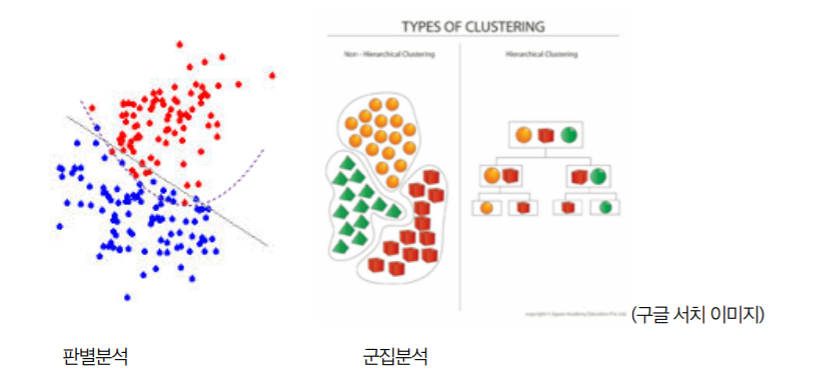

군집분석에서는 개체의 그룹에 대한 정보 없이 (사전에는 , ⃤, 구분이 없이 동일하나 분석 후 나누어 � ❎
짐) 유사성이 가까운 개체들끼리 계층적으로 묶어 가거나 군집의 개수를 정하여 군집의 중심점을 이용하
여 개체를 군집화 하는 방법이다. 판별분석은 자료 수집 시 이미 그룹이 나누어져 있어( , ) 이를 가장 � �
잘 판별하는 판별규칙을 도출하여 새로운 개체의 군집을 판별하는 방법이다. 곡선의 판별규칙을 도출하
는 것은 쉽지 않다.

# 선형판별분석의 모델링의 이해

위의 과정들을 왜 설명했나, 선형판별분석은 PCA와 마찬가지로 축소 방법중 하나이다. Linear Discriminant Analysis는 PCA와 비슷하게 입력 데이터 세트를 저차원 공간으로 투영(project)시켜 차원을 축소하는 기법이지만, PCA와 다르게 LDA는 지도학습의 분류에서 사용된다

## LDA의 원리

출처 https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-18-%EC%84%A0%ED%98%95%ED%8C%90%EB%B3%84%EB%B6%84%EC%84%9DLDA

PCA는 데이터의 변동성이 최대가 되는 축을 찾아 주성분으로 정했지만, LDA는 데이터의 Target값 클래스끼리 최대한 분리할 수 있는 축을 찾습니다. 아래 그림을 통해 설명해보겠습니다

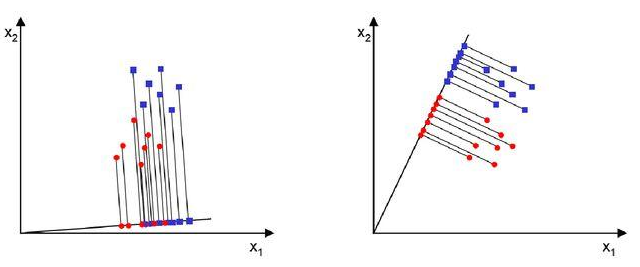

LDA는 바로 오른쪽 그림과 같이 분류를 진행합니다. 투영 후 두 클래스 간의 분산은 최대한 크게 가져가고 클래스 내부의 분산은 최대한 작게 가져가는 방식을 사용합니다. 즉 클래스 간 분산이 최대가 된다는 것은 각 클래스의 중심(평균)이 서로 멀어지도록 분류한다는 점입니다. 클래스 내부의 분산이 작아진다는 것은 하나의 클래스끼리는 뭉쳐있다는 뜻입니다, 즉 클래스 간 분산이 최대가 되고 클래스 내부 분산이 촤소가 되면 [(클래스 간 분산) / (클래스 내부 분산)]은 최대가 됩니다.
다시 말하자면 LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소합니다.
LDA은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 하므로 SVM 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 사용하면 좋습니다.

In [148]:
!pip install catboost
!pip install category_encoders

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
train = '/content/drive/MyDrive/dataset/train.csv'
test = '/content/drive/MyDrive/dataset/test.csv'
submission = '/content/drive/MyDrive/dataset/submission.csv'

In [152]:
train = pd.read_csv(train)
test = pd.read_csv(test)

In [153]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

데이터 변수 설명





index


gender: 성별


car: 차량 소유 여부


reality: 부동산 소유 여부


child_num: 자녀 수


income_total: 연간 소득


income_type: 소득 분류


							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



edu_type: 교육 수준


							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



family_type: 결혼 여부


							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



house_type: 생활 방식


							['Municipal apartment', 'House / apartment', 'With parents',

							

							 'Co-op apartment', 'Rented apartment', 'Office apartment']



DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



FLAG_MOBIL: 핸드폰 소유 여부


work_phone: 업무용 전화 소유 여부


phone: 전화 소유 여부


email: 이메일 소유 여부


occyp_type: 직업 유형													


family_size: 가족 규모


begin_month: 신용카드 발급 월
			

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도


							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [155]:
train['occyp_type']

0                   NaN
1              Laborers
2              Managers
3           Sales staff
4              Managers
              ...      
26452        Core staff
26453               NaN
26454        Core staff
26455          Laborers
26456    Security staff
Name: occyp_type, Length: 26457, dtype: object

# 데이터 전처리

## 1. 결측치 처리

occyp_type 변수에만 결측치가 있음을 확인.

In [156]:
train = train.drop(["index"], axis=1)
train.fillna(0, inplace=True)

test = test.drop(["index"], axis=1)
test.fillna(0, inplace=True)

## 2. 이상치 처리

In [157]:
train = train[(train['family_size'] <= 7)]
train = train.reset_index(drop=True)

# Feature Engineering

## 1.의미없는 변수 제거

- index 제거
- FLAG_MOBIL 삭제:모든 값이 1로 동일

In [158]:
train.drop(['FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['FLAG_MOBIL'], axis=1, inplace=True)

In [159]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,0,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0
26447,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,0,2.0,-47.0,2.0
26448,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0
26449,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0


2. DAYS_EMPLOYED
- 양수인 데이터는 현재 무직자 혹은 학생으로 판단, 0처리

In [160]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)

 3. DAYS_BIRTH, begin_month, DAYS_EMPLOYED
 - 음수값 -> 양수 변환

In [161]:
feats = ['DAYS_BIRTH', 'begin_month','DAYS_EMPLOYED']
for feat in feats:
  train[feat]=np.abs(train[feat])
  test[feat]=np.abs(test[feat])

4. 파생변수 생성
- numeric 변수는 최대한 다양한 특징을 보일 수 있도록 생성
- category 변수는 여러가지를 조합해 보았지만 전체 변수를 합친 ID 하나만 만들었을때 가장 logloss가 낮았음
- ref) rollcake님 글 https://dacon.io/competitions/official/235713/codeshare/2526?page=1&dtype=recent

In [162]:
for df in [train,test]:
  # before_EMPLOYED: 고용되기 전까지의 일수
  df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
  df['income_total_beforeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']
  df['before_EMPLOYED_m'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)
  df['before_EMPLOYED_w'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)
  #DAYS_BIRTH 파생변수- Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
  df['Age'] = df['DAYS_BIRTH'] // 365
  #DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))  
  df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
  #ability: 소득/(살아온 일수+ 근무일수)
  df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
  #income_mean: 소득/ 가족 수
  df['income_mean'] = df['income_total'] / df['family_size']

numpy.floor 함수는 바닥함수 (내림함수)입니다. 입력의 요소 단위의 'floor' 값을 반환합니다. 스칼라 x의 'floor'는 x보다 작거나 같은, 가장 큰 정수 입니다. 흔히 ⎣x⎦로 표현됩니다.

5. 다중공선성을 보이는 컬럼 삭제

In [163]:
train.corr()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,before_EMPLOYED,income_total_beforeEMP_ratio,before_EMPLOYED_m,before_EMPLOYED_w,Age,EMPLOYED,ability,income_mean
child_num,1.000000,0.033442,-0.343928,0.045393,0.051402,-0.012122,0.017887,0.886135,0.007353,0.001630,-0.319100,0.153997,0.012878,-0.017916,-0.343914,0.039223,0.123385,-0.346738
income_total,0.033442,1.000000,-0.064220,0.086901,-0.034100,0.019121,0.089882,0.024458,0.017993,0.008561,-0.097788,0.832123,0.003844,-0.019961,-0.064074,0.082570,0.864381,0.718214
DAYS_BIRTH,-0.343928,-0.064220,1.000000,-0.020250,-0.178619,0.029412,-0.111255,-0.303883,0.057237,0.025212,0.873382,-0.433958,0.025528,0.011662,0.999692,-0.002727,-0.439668,0.072727
DAYS_EMPLOYED,0.045393,0.086901,-0.020250,1.000000,0.108592,0.041912,0.002889,0.057411,0.082692,0.022858,-0.504621,0.314287,-0.001695,-0.000801,-0.020651,0.998838,-0.110589,0.028873
work_phone,0.051402,-0.034100,-0.178619,0.108592,1.000000,0.310005,-0.031008,0.068571,0.008672,-0.003237,-0.207140,0.041181,-0.014008,-0.017384,-0.179068,0.104417,0.010439,-0.052172
phone,-0.012122,0.019121,0.029412,0.041912,0.310005,1.000000,0.012529,-0.001139,0.014392,0.003382,0.004981,0.005657,-0.002702,0.004323,0.029257,0.041946,-0.006687,0.012799
email,0.017887,0.089882,-0.111255,0.002889,-0.031008,0.012529,1.000000,0.017391,-0.002311,0.014862,-0.097478,0.111919,0.002325,-0.014221,-0.111207,0.000252,0.120838,0.062048
family_size,0.886135,0.024458,-0.303883,0.057411,0.068571,-0.001139,0.017391,1.000000,0.023426,0.006389,-0.290375,0.130263,0.015227,-0.019959,-0.303831,0.051422,0.092527,-0.525362
begin_month,0.007353,0.017993,0.057237,0.082692,0.008672,0.014392,-0.002311,0.023426,1.000000,0.147486,0.009143,0.009452,0.005391,-0.000690,0.057299,0.083362,-0.031944,-0.009633
credit,0.001630,0.008561,0.025212,0.022858,-0.003237,0.003382,0.014862,0.006389,0.147486,1.000000,0.010637,0.003503,0.002879,0.010156,0.025087,0.023881,-0.005440,0.006109


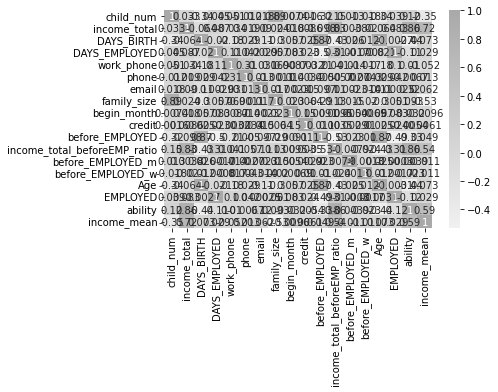

In [164]:
import seaborn as sns
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(train.corr(), annot = True, cmap = cmap)
plt.show()

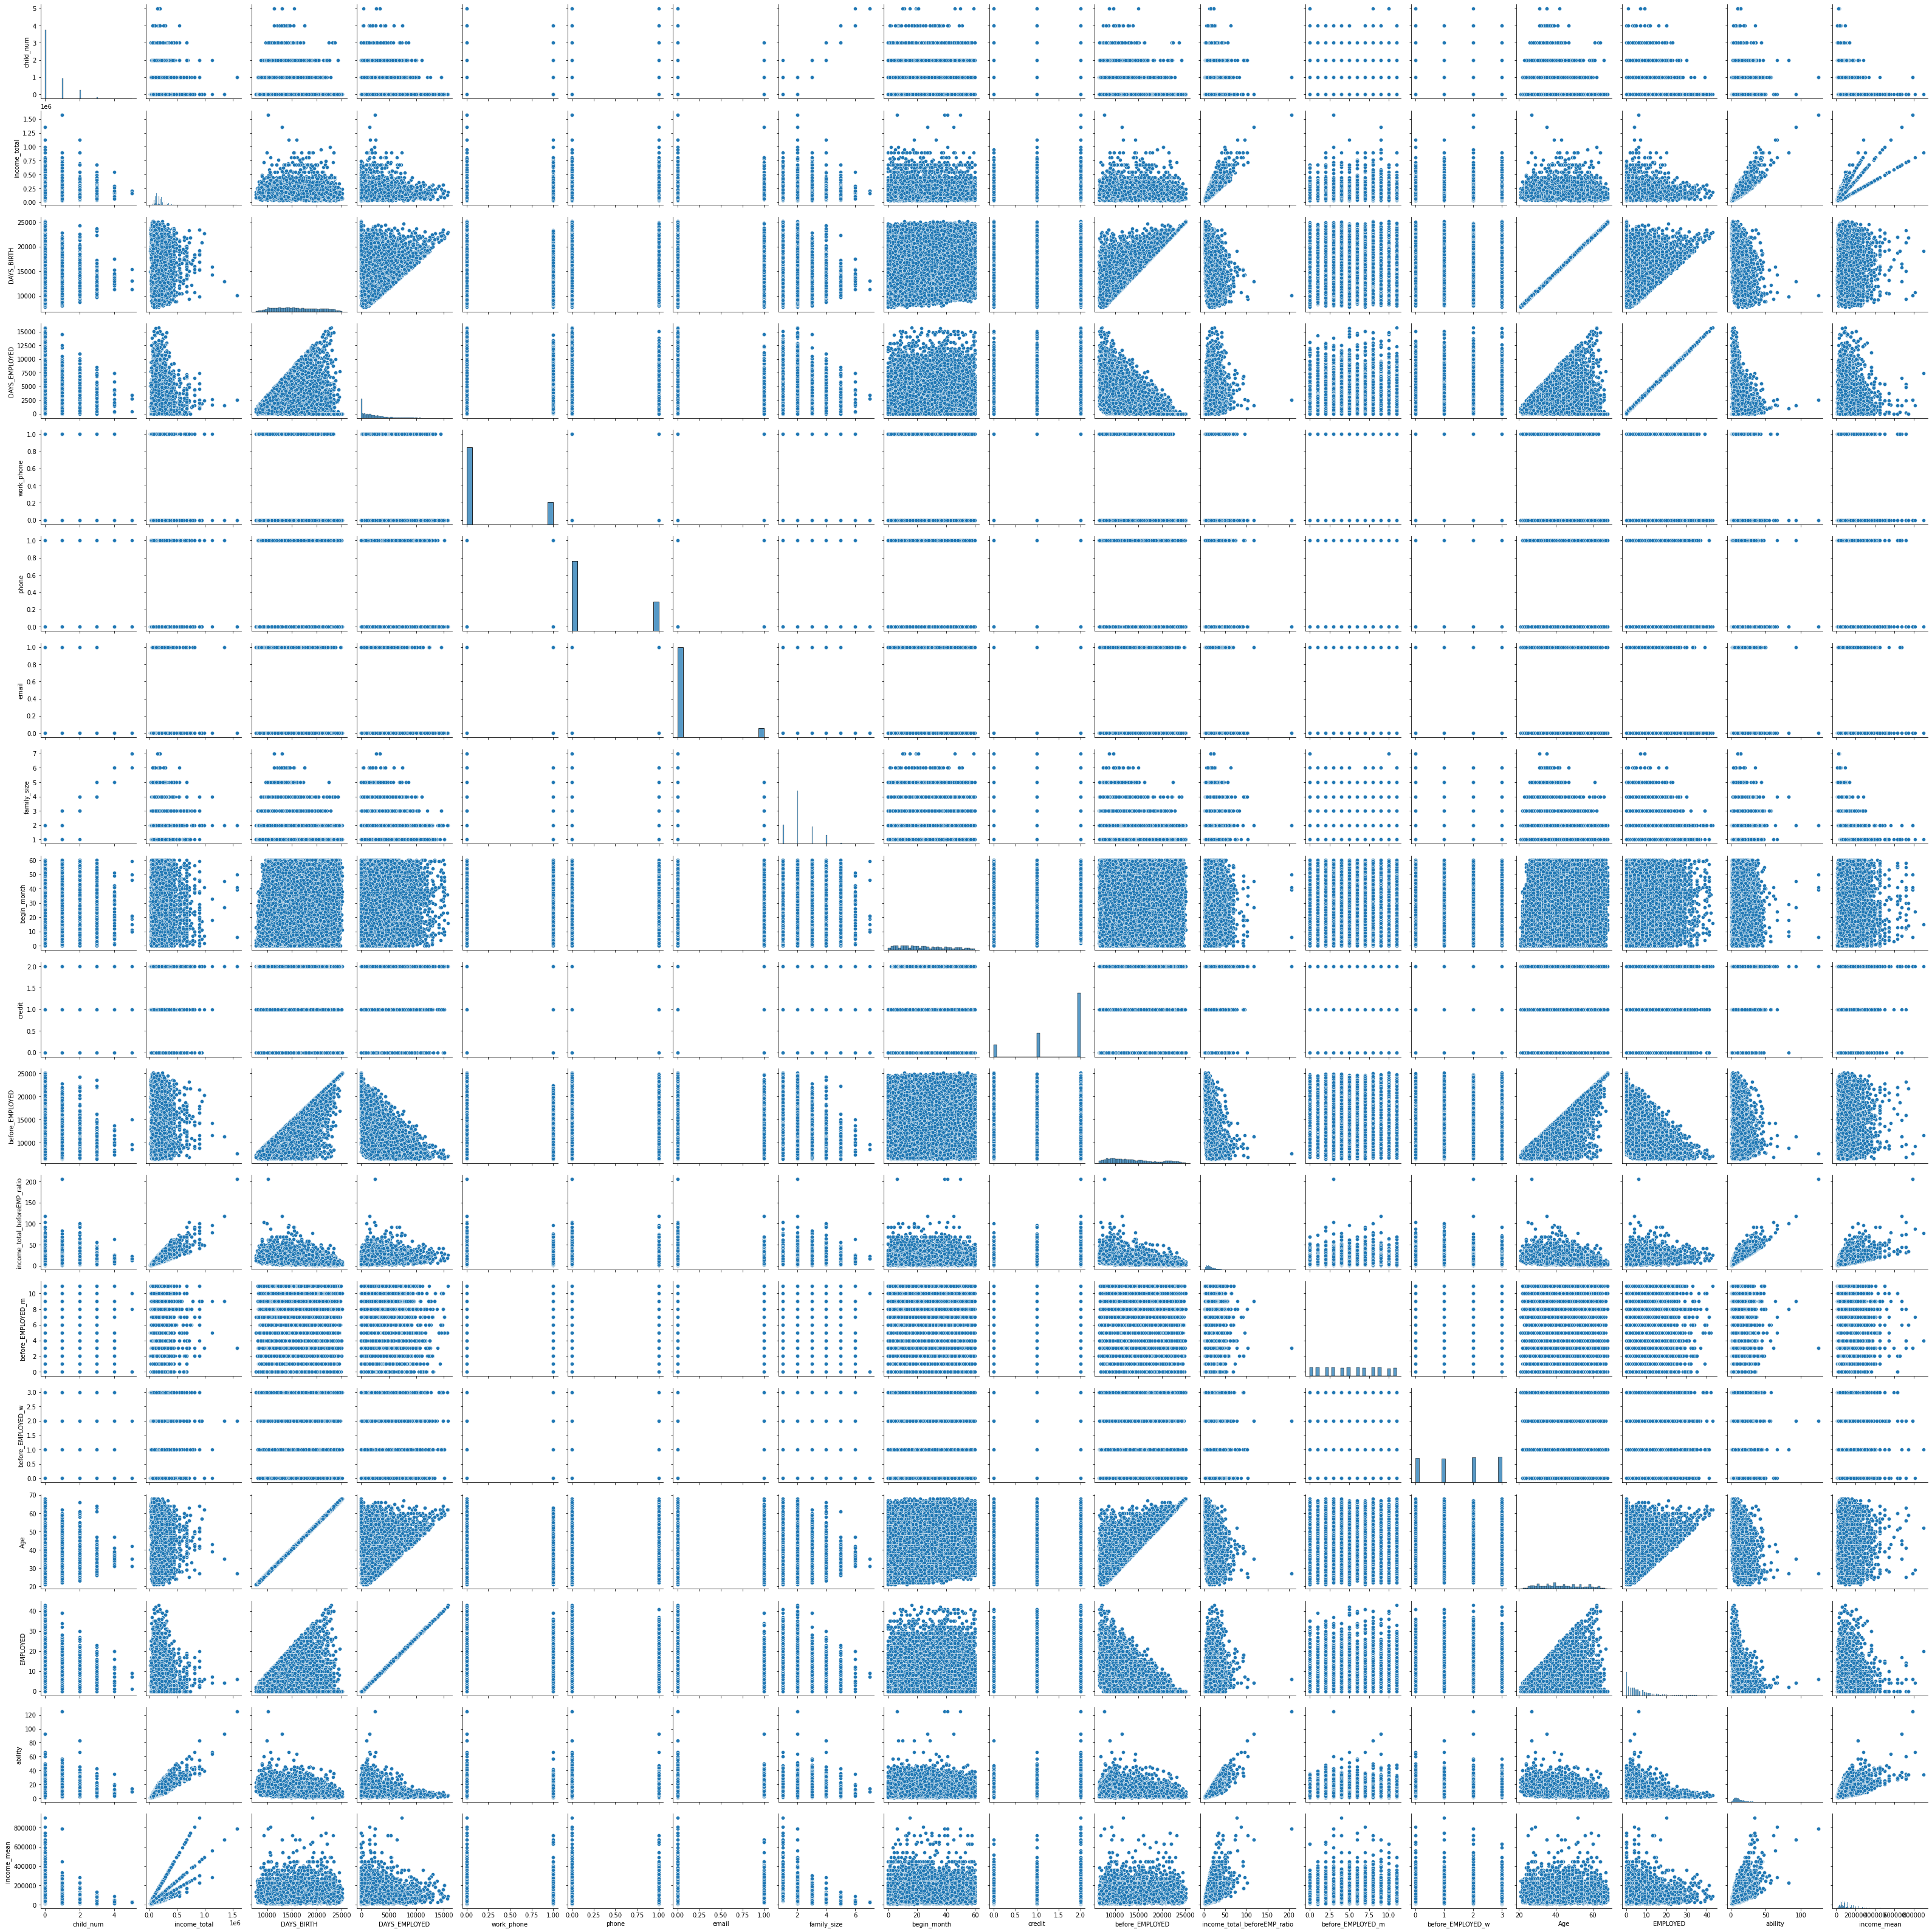

In [165]:
sns.pairplot(train)
plt.show()

너무 보기 어려워서 vif 테스트 진행

In [166]:
!pip install statsmodels

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

컬럼 삭제

In [168]:
cols = ['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED',]
train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

# SCailing, one-hot encoding

In [169]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  14
Number of Categorical features:  8


In [170]:
numerical_feats

['income_total',
 'work_phone',
 'phone',
 'email',
 'family_size',
 'begin_month',
 'before_EMPLOYED',
 'income_total_beforeEMP_ratio',
 'before_EMPLOYED_m',
 'before_EMPLOYED_w',
 'Age',
 'EMPLOYED',
 'ability',
 'income_mean']

In [171]:
categorical_feats

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

### Log Scaling

In [172]:
for df in [train, test]:
  df['income_total'] = np.log1p(1+df['income_total'])

str 변수들에 대해 one-hot encoding 진행

In [173]:
train_ohe = pd.get_dummies(train)
test_ohe = pd.get_dummies(test)

In [174]:
train_ohe

,income_total,work_phone,phone,email,family_size,begin_month,credit,before_EMPLOYED,income_total_beforeEMP_ratio,before_EMPLOYED_m,before_EMPLOYED_w,Age,EMPLOYED,ability,income_mean,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_0,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,12.218505,0,0,0,2.0,6.0,1.0,9190,22.034820,6.0,0.0,38,12,10.882416,101250.0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.419174,0,0,1,3.0,5.0,1.0,9840,25.152439,4.0,1.0,31,4,19.156347,82500.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,13.017007,0,1,0,2.0,22.0,2.0,14653,30.710435,8.0,1.0,52,12,19.131840,225000.0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,12.218505,0,1,0,2.0,37.0,0.0,12996,15.581717,1.0,0.0,41,5,11.786962,101250.0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,11.967193,0,0,0,2.0,26.0,2.0,12932,12.179091,11.0,3.0,41,5,9.187959,78750.0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,12.323865,0,0,0,4.0,2.0,1.0,10095,22.288262,0.0,2.0,33,5,15.999431,56250.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26447,12.100723,0,0,0,2.0,47.0,2.0,12816,14.044944,7.0,2.0,41,6,10.131712,90000.0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26448,12.586227,0,0,0,2.0,25.0,2.0,8067,36.258832,4.0,0.0,27,5,24.179549,146250.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26449,12.049431,0,0,0,1.0,59.0,2.0,10038,17.035266,10.0,2.0,27,0,16.679672,171000.0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [175]:
train.describe()

,income_total,work_phone,phone,email,family_size,begin_month,credit,before_EMPLOYED,income_total_beforeEMP_ratio,before_EMPLOYED_m,before_EMPLOYED_w,Age,EMPLOYED,ability,income_mean
count,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000
mean,12.022065,0.224680,0.294204,0.091301,2.194208,26.122793,1.519451,13759.554686,15.544963,5.430003,1.515860,43.213905,5.609807,11.102327,101099.128324
std,0.480857,0.417379,0.455693,0.288042,0.898041,16.558989,0.702325,4865.994000,10.350885,3.417508,1.124198,11.514370,6.427251,6.767435,73180.923961
min,10.203666,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6547.000000,1.268406,0.000000,0.000000,21.000000,0.000000,1.235488,7560.000000
25%,11.707686,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000,9680.000000,8.581327,2.000000,1.000000,34.000000,1.000000,6.528678,56250.000000
50%,11.967193,0.000000,0.000000,0.000000,2.000000,24.000000,2.000000,12698.000000,13.404255,5.000000,2.000000,42.000000,4.000000,9.682774,78750.000000
75%,12.323865,0.000000,1.000000,0.000000,3.000000,39.000000,2.000000,16978.000000,19.813315,8.000000,3.000000,53.000000,8.000000,13.912076,126000.000000
max,14.269767,1.000000,1.000000,1.000000,7.000000,60.000000,2.000000,25152.000000,205.533081,11.000000,3.000000,68.000000,43.000000,124.792013,900000.000000


### 모델링 (전체 데이터 정규화 진행 X)

In [176]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [177]:
y_target = train_ohe['credit']
X_data = train_ohe.drop(['credit'], axis = 1, inplace=False)

In [178]:
# 데이터 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X_data, y_target, test_size= 0.3, random_state=156)

In [185]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_train,y_train)
lda_preds = lda.predict(X_val)

In [ ]:
scaler = StandardScaler()
train_ohe[numerical_feats] = scaler.fit_transform(train_ohe[numerical_feats])
test_ohe[numerical_feats] = scaler.transform(test_ohe[numerical_feats])

In [187]:
print(lda.score(y_val, lda_preds))

ValueError: ignored

In [181]:
prediction = lda.predict(X_val)

In [182]:
prediction

array([2., 2., 2., ..., 2., 2., 2.])

In [146]:
lda_preds_final = lda.predict(test_ohe)

In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, prediction)

array([[   0,   16,  938],
       [   0,   41, 1829],
       [   0,   33, 5079]])

정규화진행 후 정확도 확인

In [188]:
scaler = StandardScaler()
train_ohe[numerical_feats] = scaler.fit_transform(train_ohe[numerical_feats])
test_ohe[numerical_feats] = scaler.transform(test_ohe[numerical_feats])

In [126]:
y_target = train_ohe['credit']
X_data = train_ohe.drop(['credit'], axis = 1, inplace=False)

In [127]:
# 데이터 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X_data, y_target, test_size= 0.3, random_state=156)

In [128]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_train,y_train)
lda_preds = lda.predict(X_val)

In [129]:
print(lda.score(X_val, y_val))

0.6451612903225806


In [130]:
prediction = lda.predict(X_val)
lda_preds_final = lda.predict(test_ohe)
confusion_matrix(y_val, prediction)

array([[   0,   16,  938],
       [   0,   41, 1829],
       [   0,   33, 5079]])